# Gradient Descent

[![8ZFWfe.md.png](https://s1.ax1x.com/2020/03/12/8ZFWfe.md.png)](https://imgchr.com/i/8ZFWfe)

- $\eta$ 称为学利率（learning rate）
- $\eta$ 的取值影响获得最优解的的速度
- $\eta$ 取值不合适，甚至得不到最优解

[![8ZF2FO.md.png](https://s1.ax1x.com/2020/03/12/8ZF2FO.md.png)](https://imgchr.com/i/8ZF2FO)

- $\eta$ 是梯度下降法的**超参数**
- 注意：并不是所有函数都有唯一的极值点
 - 解决方案
       - 多次运行
       - **梯度下降法的初始点也是一个超参数**

## 1. Simulate Gradient Descent

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plot_x = np.linspace(-1, 6, 141)

In [3]:
plot_y = (plot_x-2.5)**2 - 1

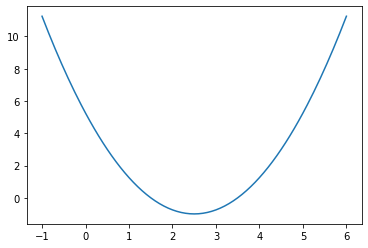

In [4]:
plt.plot(plot_x, plot_y)

In [5]:
# 损失函数的导数
def dJ(theta):
    return 2*(theta-2.5)

In [6]:
# 返回损失函数的值
def J(theta):
    return (theta-2.5)**2 - 1

In [7]:
eta = 0.1
theta = 0.0
epsilon = 1e-8

while True:
    gradient = dJ(theta)
    last_theta = theta
    theta = theta - eta * gradient
    
    if np.abs(J(theta) - J(last_theta)) < epsilon:
        break
        
print(theta)
print(J(theta))

2.499891109642585
-0.99999998814289


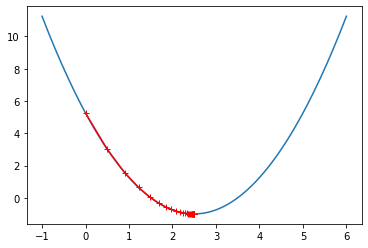

In [11]:

theta = 0.0
theta_history = [theta]

while True:
    gradient = dJ(theta)
    last_theta = theta
    theta = theta - eta * gradient
    theta_history.append(theta)
    
    if np.abs(J(theta) - J(last_theta)) < epsilon:
        break
        
plt.plot(plot_x, plot_y)
# 每一个点用 + 表示
plt.plot(np.array(theta_history), J(np.array(theta_history)), color="r", marker="+")

In [9]:
len(theta_history)

46

## 2. 封装Gradient Descent 代码

In [10]:
def gradient_descent(initial_theta, eta, epsilon=1e-8):
    theta = initial_theta
    theta_history.append(initial_theta)
    
    while True:
        gradient = dJ(theta)
        last_theta = theta
        theta = theta - eta * gradient
        theta_history.append(theta)

        if np.abs(J(theta) - J(last_theta)) < epsilon:
            break

def plot_theta_history():
    plt.plot(plot_x, plot_y)
    plt.plot(np.array(theta_history), J(np.array(theta_history)), color="r", marker="+")

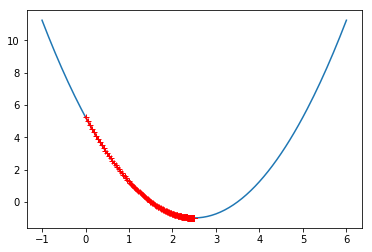

In [11]:
eta = 0.01
theta_history = []
gradient_descent(0, eta)
plot_theta_history()

In [12]:
len(theta_history)

424

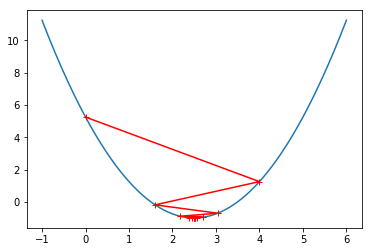

In [13]:
eta = 0.8
theta_history = []
gradient_descent(0, eta)
plot_theta_history()

In [14]:
len(theta_history)

22

In [15]:
eta = 1.1
theta_history = []
gradient_descent(0, eta)
plot_theta_history()

OverflowError: (34, 'Result too large')

In [16]:
# 损失函数返回结果太大， 导致程序中断
# 可做如下修改
def J(theta):
    try:
        return (theta-2.5)**2 - 1
    except:
        return float('inf')

In [17]:
def gradient_descent(initial_theta, eta, n_iters = 1e4, epsilon=1e-8):
    theta = initial_theta
    theta_history.append(initial_theta)
    i_iter = 0
    
    while i_iter < n_iters:
        gradient = dJ(theta)
        last_theta = theta
        theta = theta - eta * gradient
        theta_history.append(theta)

        if np.abs(J(theta) - J(last_theta)) < epsilon:
            break
        
        i_iter += 1

def plot_theta_history():
    plt.plot(plot_x, plot_y)
    plt.plot(np.array(theta_history), J(np.array(theta_history)), color="r", marker="+")

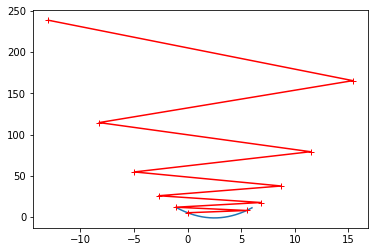

In [18]:
# 当 eta 取到 1.1 时，此时损失函数不减反增加
eta = 1.1
theta_history = []
gradient_descent(0, eta, n_iters=10)
plot_theta_history()

In [19]:
len(theta_history)

11